In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:,[1,2,3,4]]
y = dataset.iloc[:,-1]

In [3]:
##building the model
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

KMeans(n_clusters=3)

In [4]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.5525919445499757


Martin Yap, Hoyun Yoon, 
ICP 6 Question 2 Parts a - d

Load in the credit card data

In [5]:
credit = pd.read_csv('credit card.csv')

Identify any NaN values in the data

In [6]:
credit[credit.isnull().any(axis = 1)].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


Change all NaN values with the mean

In [7]:
credit['MINIMUM_PAYMENTS'].fillna(value = credit['MINIMUM_PAYMENTS'].mean(), inplace=True)

Check for any other NaN values

In [8]:
credit[credit.isnull().any(axis = 1)].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Fill in any remaining NaN values with their mean

In [9]:
credit['CREDIT_LIMIT'].fillna(value = credit['CREDIT_LIMIT'].mean(), inplace=True)

Check to make sure there are no NaN values 

In [10]:
credit[credit.isnull().any(axis = 1)].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Create the x and y datasets

In [11]:
x = credit.iloc[:,[1,2,3,4]]
y = credit.iloc[:,-1]

Find the within cluster sum of squares for k values from 1 to 20

In [12]:
wcss = []

for i in range(1, 21):
  kmeans = KMeans(n_clusters=i, max_iter=300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Plot the Elbow graph and identify the best k value

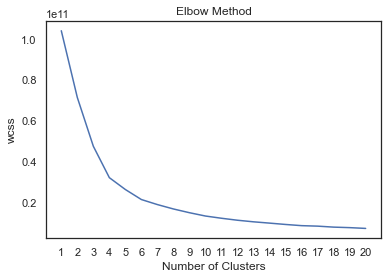

In [13]:
plt.plot(range(1, 21), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.xticks(range(1, 21))
plt.show()

The best k value to use is k = 6 since the decrease in wcss starts to slow down after this point on the graph.

Make the KMeans model with the given k

In [14]:
from sklearn.cluster import KMeans
nclusters = 6
km = KMeans(n_clusters=nclusters)
km.fit(x)

KMeans(n_clusters=6)

Calculate the silhouette score with k = 6

In [15]:
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.4936828242571912


Feature scale the data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x)
x_norm = scaler.transform(x)

Apply the K-Means method on the data

In [17]:
km.fit(x_norm)

KMeans(n_clusters=6)

Calculate the silhouette score

In [18]:
y_cluster_kmeans = km.predict(x_norm)
from sklearn import metrics
score = metrics.silhouette_score(x_norm, y_cluster_kmeans)
print(score)

0.500914567470581


The silhouette score tends to fluctuate between 0.49 and 0.50 on multiple runs. The flucuation may be due to us using the MinMaxScaler. Comparing this score with the original, we do not see any significant improvement. 